In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import numpy as np

In [7]:
(x_train, y_train),(x_test, y_test) =  datasets.cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

# Reshaping array y into 1 dim

In [10]:
y_train = y_train.reshape(-1, )

In [11]:
classes = ["airplane","automobile", "bird", "cat", "deer", "dog","frog", "horse","ship","truck"]

In [36]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

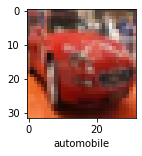

In [37]:
plot_sample(x_train, y_train, 5)

# Normalizing Data

In [14]:
x_train = x_train/255
x_test = x_test/255

# Building ANN Model

In [48]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 946s 605ms/step - loss: 1.8589 - accuracy: 0.3346
Epoch 2/10
1563/1563 [==============================] - 1032s 660ms/step - loss: 1.6537 - accuracy: 0.4154
Epoch 3/10
1563/1563 [==============================] - 1103s 705ms/step - loss: 1.5680 - accuracy: 0.4440
Epoch 4/10
1563/1563 [==============================] - 1025s 656ms/step - loss: 1.5076 - accuracy: 0.4695
Epoch 5/10
1563/1563 [==============================] - 922s 590ms/step - loss: 1.4583 - accuracy: 0.4834
Epoch 6/10
1563/1563 [==============================] - 933s 597ms/step - loss: 1.4129 - accuracy: 0.5026
Epoch 7/10
1563/1563 [==============================] - 939s 601ms/step - loss: 1.3760 - accuracy: 0.5139
Epoch 8/10
1563/1563 [==============================] - 962s 615ms/step - loss: 1.3429 - accuracy: 0.5273
Epoch 9/10
1563/1563 [==============================] - 975s 624ms/step - loss: 1.3055 - accuracy: 0.5389
Epoch 10/10
1563/1563 [====================

In [53]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 80s 255ms/step - loss: 1.6052 - accuracy: 0.4370


[1.6051586866378784, 0.43700000643730164]

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.58      0.53      0.55      1000
           1       0.61      0.48      0.54      1000
           2       0.47      0.29      0.36      1000
           3       0.41      0.27      0.32      1000
           4       0.61      0.17      0.26      1000
           5       0.52      0.25      0.33      1000
           6       0.55      0.53      0.54      1000
           7       0.55      0.52      0.53      1000
           8       0.75      0.45      0.56      1000
           9       0.24      0.89      0.37      1000

    accuracy                           0.44     10000
   macro avg       0.53      0.44      0.44     10000
weighted avg       0.53      0.44      0.44     10000



# CNN Model

In [16]:
cnn = keras.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [18]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

In [19]:
%time
cnn.fit(x_train, y_train, epochs = 10)

Wall time: 0 ns
Epoch 1/10
1563/1563 [==============================] - 257s 164ms/step - loss: 1.4956 - accuracy: 0.4604
Epoch 2/10
1563/1563 [==============================] - 279s 178ms/step - loss: 1.1821 - accuracy: 0.5842
Epoch 3/10
1563/1563 [==============================] - 279s 178ms/step - loss: 1.0560 - accuracy: 0.6314
Epoch 4/10
1563/1563 [==============================] - 313s 200ms/step - loss: 0.9732 - accuracy: 0.6592
Epoch 5/10
1563/1563 [==============================] - 304s 194ms/step - loss: 0.9115 - accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.8651 - accuracy: 0.6977
Epoch 7/10
1563/1563 [==============================] - 321s 205ms/step - loss: 0.8208 - accuracy: 0.7125
Epoch 8/10
1563/1563 [==============================] - 319s 204ms/step - loss: 0.7851 - accuracy: 0.7262
Epoch 9/10
1563/1563 [==============================] - 316s 202ms/step - loss: 0.7502 - accuracy: 0.7370
Epoch 10/10
1563/1563 [=======

In [20]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 18s 58ms/step - loss: 0.9362 - accuracy: 0.6837


[0.9362078905105591, 0.6837000250816345]

In [21]:
y_test = y_test.reshape(-1,)

In [27]:
y_pred = cnn.predict(x_test)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]

# Results

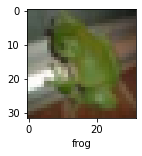

In [38]:
plot_sample(x_test, y_test, 7)

In [34]:
classes[y_classes[7]]

'frog'

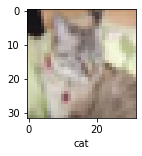

In [39]:
plot_sample(x_test, y_test, 8)

In [40]:
classes[y_classes[8]]

'cat'

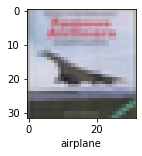

In [41]:
plot_sample(x_test, y_test, 3)

In [42]:
classes[y_classes[3]]

'airplane'